In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_im_results(accuracy_means_our,
                    disparity_means_our,
                    accuracy_min_max,
                    disparity_min_max,
                    accuracy_means_auth,
                    disparity_means_auth,
                    dataset_name,
                    ax,
                    scale):
    purple_ = '#BF55EC'
    yellow_ = '#F7CA18'

    labels = ['Greedy', 'DeepWalk', 'FairWalk', 'CrossWalk']

    # accuracy_means_our = [18.24988764044944, 18.327820224719098, 18.121447191011235, 15.931244943820223]
    # accuracy_min_max = np.array([
    #     [18.126292134831463, 18.366292134831458],
    #     [18.17384269662921, 18.443505617977525],
    #     [17.778157303370783, 18.33105617977528],
    #     [15.015370786516854, 16.376898876404496]])
    acc_err_our = np.array([(mean-min, max-mean) for mean, (min, max) in zip(accuracy_means_our, accuracy_min_max.tolist())]).T

    # disparity_means_our = [35.218892303297636, 53.01709539728629, 22.261824709178747, 23.004254037781976]
    # disparity_min_max = np.array([
    #     [34.62708440264651, 36.476698135685794],
    #     [43.2864558274312, 62.69979979865575],
    #     [4.084024042596093, 41.46592306553245],
    #     [5.615492226801093, 41.84654382885949]
    # ])
    disp_err_our = np.array([(mean-min, max-mean) for mean, (min, max) in zip(disparity_means_our, disparity_min_max.tolist())]).T

    x = np.array([2, 5.5, 9, 12.5]) # the label locations
    width = 0.35  # the width of the bars

    #fig, ax = plt.subplots()
    bars1 = ax.bar(x - width*1.5 -0.1, accuracy_means_auth, width, label='Total Influence Author\'s', color=purple_)
    bars2 = ax.bar(x - width/2 -0.1, disparity_means_auth, width, label='Disparity Author\'s', color=yellow_)
    bars3 = ax.bar(x + width/2 +0.1, accuracy_means_our, width, label='Total Influence Reproduction', color="blue", yerr=acc_err_our)
    bars4 = ax.bar(x + width*1.5 +0.1, disparity_means_our, width, label='Disparity Reproduction', color="orange", yerr=disp_err_our)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('%')
    ax.set_title(f'Influence maximization on \n{dataset_name} dataset')
    ax.set_xticks(x, labels)
    ax.legend()

    # ax.bar_label(bars1, padding=3)
    # ax.bar_label(bars2, padding=3)
    #
    # ax.bar_label(bars3, padding=3)
    # ax.bar_label(bars4, padding=3)

    ax.set_ylim(top=scale)
    #fig.tight_layout()

    #plt.show()

Loading results for synth2 dataset and greedy seed selection
Loading results for synth2 dataset and default reweighting method
Loading results for synth2 dataset and fairwalk reweighting method
Loading results for synth2 dataset and crosswalk reweighting method
Loading results for synth3 dataset and greedy seed selection
Loading results for synth3 dataset and default reweighting method
Loading results for synth3 dataset and fairwalk reweighting method
Loading results for synth3 dataset and crosswalk reweighting method
Loading results for rice dataset and greedy seed selection
Loading results for rice dataset and default reweighting method
Loading results for rice dataset and fairwalk reweighting method
Loading results for rice dataset and crosswalk reweighting method
Loading results for twitter dataset and greedy seed selection
Loading results for twitter dataset and default reweighting method
Loading results for twitter dataset and fairwalk reweighting method
Loading results for twitt

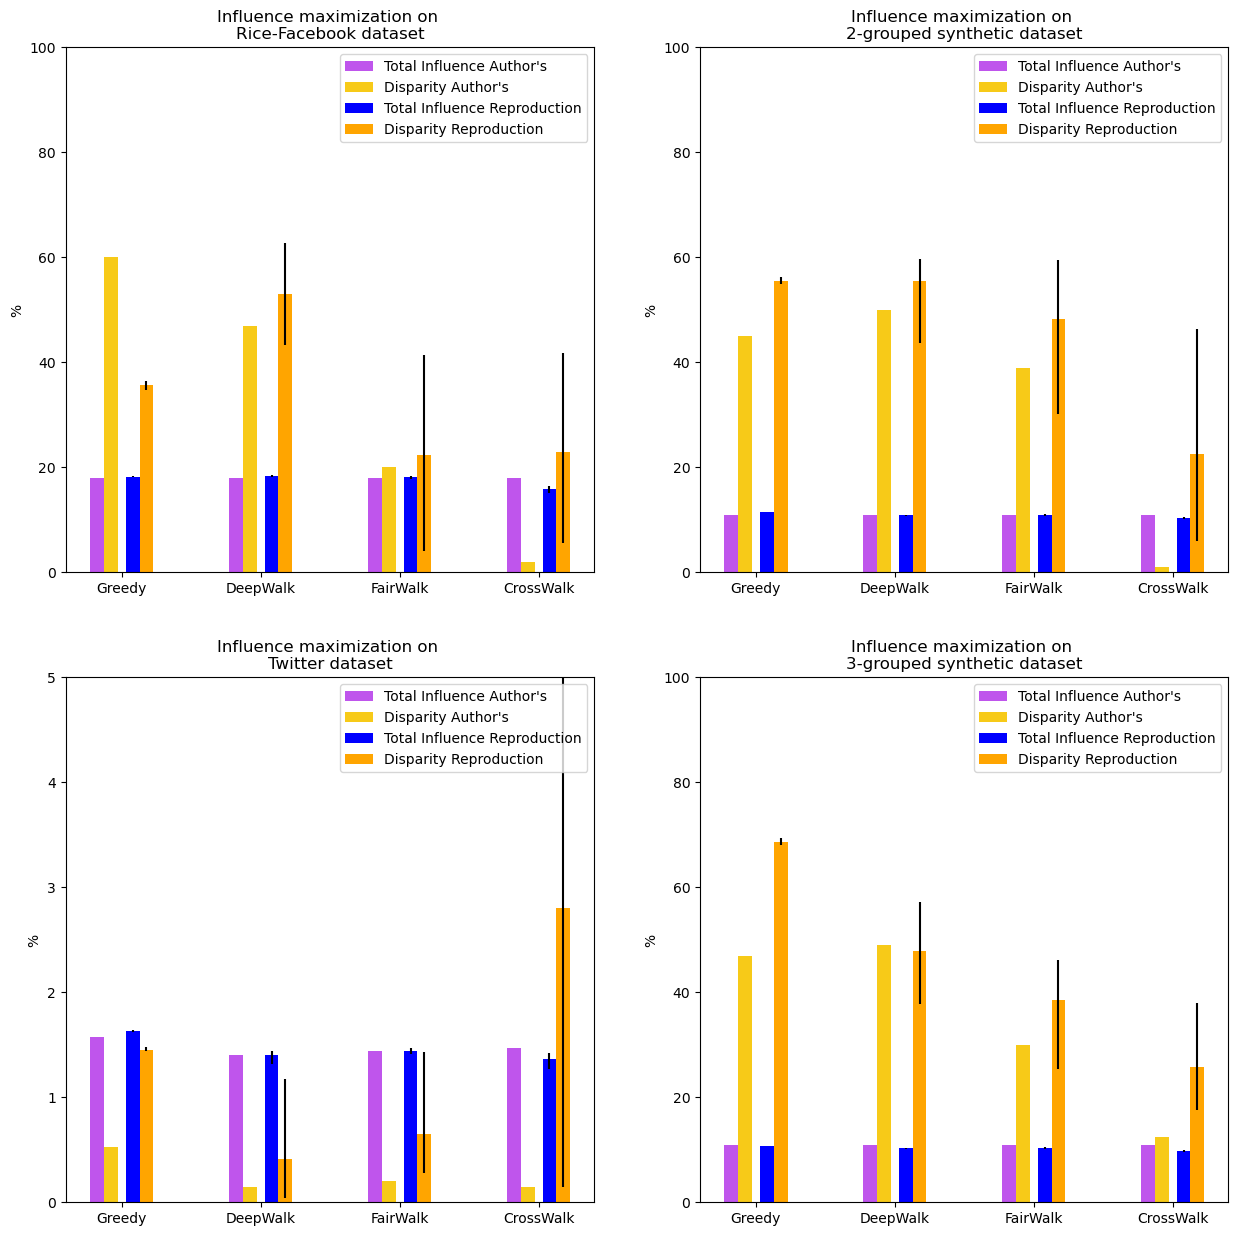

In [28]:
import json
import os

results_dir = '../results/influence_maximization/bigbatch_d32'
greedy_dir = '../results/influence_maximization/greedy_results'
datasets = ['synth2', 'synth3', 'rice', 'twitter']
dataset_names = ['2-grouped synthetic', '3-grouped synthetic', 'Rice-Facebook', 'Twitter']
dataset_metrics = [
    {
        'accuracy_means_auth': [11, 11, 11, 11],
        'disparity_means_auth': [45, 50, 39, 1],
    },
    {
        'accuracy_means_auth': [11, 11, 11, 11],
        'disparity_means_auth': [47, 49, 30, 12.5],
    },
    {
        'accuracy_means_auth': [18, 18, 18, 18],
        'disparity_means_auth': [60, 47, 20, 2],
    },
    {
        'accuracy_means_auth': [1.57, 1.4, 1.44, 1.47],
        'disparity_means_auth': [0.53, 0.15, 0.2, 0.15],
    }
]

reweight_methods = ['default', 'fairwalk', 'crosswalk']

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax_ids = [(0, 1), (1, 1), (0, 0), (1, 0)]
for dataset, dataset_name, ax_id, metrics in zip(datasets, dataset_names, ax_ids, dataset_metrics):
    inf_mean_ours = []
    inf_min_max = []
    disp_mean_ours = []
    disp_min_max = []

    def process_results(results):
        infs = results['influences']
        inf_min_max.append((np.min(infs), np.max(infs)))
        inf_mean_ours.append(np.mean(infs))

        disps = results['disparities']
        disp_min_max.append((np.min(disps), np.max(disps)))
        disp_mean_ours.append(np.mean(disps))

    print(f'Loading results for {dataset} dataset and greedy seed selection')
    filename = f'{dataset}_greedy.json'
    filepath = os.path.join(greedy_dir, filename)
    with open(filepath, 'r') as f:
        results = json.load(f)
    process_results(results)


    for rwm in reweight_methods:
        print(f'Loading results for {dataset} dataset and {rwm} reweighting method')
        filename = f'{dataset}_{rwm}_mean_over_10_seedsets.json'
        filepath = os.path.join(results_dir, filename)
        with open(filepath, 'r') as f:
            results = json.load(f)

        process_results(results)

    inf_mean_ours = np.array(inf_mean_ours)
    inf_min_max = np.array(inf_min_max)
    disp_mean_ours = np.array(disp_mean_ours)
    disp_min_max = np.array(disp_min_max)
    acc_means_auth = np.array(metrics['accuracy_means_auth'])
    disp_means_auth = np.array(metrics['disparity_means_auth'])
    scale = 5 if dataset == 'twitter' else 100
    plot_im_results(inf_mean_ours, disp_mean_ours, inf_min_max, disp_min_max, acc_means_auth, disp_means_auth, dataset_name, ax[ax_id], scale=scale)

#fig.tight_layout()